# Fitbit Analysis

## Table of Contents

[1. Introduction](##1.-Introduction)

[2. Research Questions](##2.-research-questions)

[3. Data Source](##3.-data-source) 

[4. Understanding the Data](##4.-understanding-the-data)
* [4.1 Importing Data From Period 1](##4.1-importing-data-from-period-1)
* [4.2 Importing Data From Period 2](##4.2-importing-data-from-period-2)
* [4.3 Finding the number of recorded users of data for both periods](##4.3-finding-the-number-of-recorded-users-of-data-for-both-periods)

[5. Data Cleaning](##5.-data-cleaning)

[6. Exploratory Data Analysis](##6.-exploratory-data-analysis)
* [6.1 Analyzing Data to Find the Usage of the Device By Activity Levels](##6.1-analyzing-data-to-find-the-usage-of-the-device-by-activity-levels) 
* [6.2 Analyzing Data to Find Any Correlation Between Overall Activity Minutes and Calories Burnt](##6.2-analyzing-data-to-find-any-correlation-between-overall-activity-minutes-and-calories-burnt) 
* [6.3 Analyzing Data to Find Any Correlation Between Overall Activity Minutes and Sleep](##6.3-analyzing-data-to-find-any-correlation-between-overall-activity-minutes-and-sleep) 
* [6.4 Analyzing Data to Find what hour of the day are users most active](##6.4-analyzing-data-to-find-what-hour-of-the-day-are-users-most-active) 

[7. Summary and Conclusion](##7.-summary-and-conclusion)


## 1. Introduction
Bellabeat is a wellness company that designs and manufactures health and fitness tracking devices for women. These devices offer features like heart rate monitoring, step counting, sleep tracking and calorie measurement, empowering users to stay aware of their physical activity levels and overall health. Urška Sršen, cofounder and Chief Creative Officer of Bellabeat believes that analyzing smart device fitness data could help unlock new growth opportunities for the company. In this case study, we focus on one of Bellabeat’s products which have their dataset made publicly available by Morbius to gain insights into how consumers use their smart devices.

## 2. Research Questions
- How regularly do the users wear the devices for exercising?
- Does being active result in more calories burnt?
- Does being active result in a better night's sleep?
- What time of the day are users the most active?


## 3. Data Source

The dataset used in the project is available at: https://www.kaggle.com/datasets/arashnic/fitbit/data

It contains 30 FitBit female users who consented to the submission of personal tracker data from a period between 12 March 2016 to 12 May 2016. The data is stored in CSV files and is broken up into two periods. The first period of data ranges from 12 March 2016 to 11 April 2016 and contains 11 files. The second period of data ranges from  12 April 2016 to 12 May 2016 and contains 18 files. In both periods, the data collected contains a table summary of their daily activity and higher level of granularity such as heart rate, calories, steps, intensities, sleep duration, etc recorded in seconds/minutes/hours. 



## 4. Understanding the Data
For both periods, we chose to analyze the daily activity summary along with their detailed minute-by-minute measurements for calories, MET, steps and intensities. 
The seconds-by-seconds heart rate, sleep and weight data were also imported. There is also a **Sleepday_merged.csv** file that is in period 2 but not in period 1 which we will have a look at later.

In [31]:
# Loading packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 4.1 Importing Data From Period 1

In [32]:
# getting current directory
cwd = os.getcwd()

# Load data for period 12 March 2016 to 11 April 2016
daily_act_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv")
calories_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv")
met_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv")
steps_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv")
intensities_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv")
hr_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv")
sleep_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv")
weight_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv")

## 4.2 Importing Data From Period 2

In [33]:
# Load data for period 12 April 2016 to 12 May 2016
daily_act_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
calories_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
met_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
steps_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
intensities_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
hr_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleep_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
sleepday_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")

## 4.3 Finding the number of recorded users of data for both periods

In [34]:
# Get unique ids for period 1
daily_act_period1_ids = pd.unique(daily_act_period1_df['Id'])
calories_period1_ids = pd.unique(calories_period1_df['Id'])
met_period1_ids = pd.unique(met_period1_df['Id'])
steps_period1_ids = pd.unique(steps_period1_df['Id'])
intensities_period1_ids = pd.unique(intensities_period1_df['Id'])
hr_period1_ids = pd.unique(hr_period1_df['Id'])
sleep_period1_ids = pd.unique(sleep_period1_df['Id'])
weight_period1_ids = pd.unique(weight_period1_df['Id'])

# Get unique ids for period 2
daily_act_period2_ids = pd.unique(daily_act_period2_df['Id'])
calories_period2_ids = pd.unique(calories_period2_df['Id'])
met_period2_ids = pd.unique(met_period2_df['Id'])
steps_period2_ids = pd.unique(steps_period2_df['Id'])
intensities_period2_ids = pd.unique(intensities_period2_df['Id'])
hr_period2_ids = pd.unique(hr_period2_df['Id'])
sleep_period2_ids = pd.unique(sleep_period2_df['Id'])
sleepday_period2_ids = pd.unique(sleepday_period2_df['Id'])
weight_period2_ids = pd.unique(weight_period2_df['Id'])

print(f'Number of users for period 1 - \n' 
      f'Daily activity: {len(daily_act_period1_ids)}\n'
      f'Calories: {len(calories_period1_ids)}\n'  
      f'MET:{len(met_period1_ids)}\n' 
      f'Steps:{len(steps_period1_ids)}\n' 
      f'Intensities:{len(intensities_period1_ids)}\n' 
      f'Heart rate:{len(hr_period1_ids)}\n' 
      f'Sleep:{len(sleep_period1_ids)}\n' 
      f'Weight:{len(weight_period1_ids)}\n')

print(f'Number of users in period 2\n' 
      f'Daily activity: {len(daily_act_period2_ids)}\n'
      f'Calories: {len(calories_period2_ids)}\n'  
      f'MET:{len(met_period2_ids)}\n' 
      f'Steps:{len(steps_period2_ids)}\n' 
      f'Intensities:{len(intensities_period2_ids)}\n' 
      f'Heart rate:{len(hr_period2_ids)}\n' 
      f'Sleep:{len(sleep_period2_ids)}\n' 
      f'SleepDay:{len(sleepday_period2_ids)}\n' 
      f'Weight:{len(weight_period2_ids)}\n')

Number of users for period 1 - 
Daily activity: 35
Calories: 34
MET:34
Steps:34
Intensities:34
Heart rate:14
Sleep:23
Weight:11

Number of users in period 2
Daily activity: 33
Calories: 33
MET:33
Steps:33
Intensities:33
Heart rate:14
Sleep:24
SleepDay:24
Weight:8



## 5. Data Cleaning

We will not be analyzing heart rate and weight data as there were not many recorded users in both periods. For period 1, there is one missing user id in calories, MET, steps and intensities data. Let's find the missing id and remove it from the daily activity summary data.

In [35]:
# Finding daily activity ids not in the calories 
ids_not_in_calories = []
for id in daily_act_period1_ids:
    if id not in calories_period1_ids:
        ids_not_in_calories.append(id.tolist())
print(f"ids not in calories hr list {ids_not_in_calories}\n")

# Finding daily activity ids not in the MET list
ids_not_in_met = []
for id in daily_act_period1_ids:
    if id not in met_period1_ids:
        ids_not_in_met.append(id.tolist())
print(f"ids not in met list {ids_not_in_met}\n")

# Finding daily activity ids not in the steps list
ids_not_in_step = []
for id in daily_act_period1_ids:
    if id not in steps_period1_ids:
        ids_not_in_step.append(id.tolist())
print(f"ids not in step list {ids_not_in_step}\n")

# Finding daily activity ids not in the intensities list
ids_not_in_intensities = []
for id in daily_act_period1_ids:
    if id not in intensities_period1_ids:
        ids_not_in_intensities.append(id.tolist())
print(f"ids not in intensities list {ids_not_in_intensities}")

ids not in calories hr list [4388161847]

ids not in met list [4388161847]

ids not in step list [4388161847]

ids not in intensities list [4388161847]


The missing user ID is **4388161847**. Lets see what is recorded in the daily actitivty summary since that id is missing.

In [36]:
daily_act_period1_df[daily_act_period1_df['Id']==4388161847].head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
241,4388161847,3/29/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1878
242,4388161847,3/30/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1878
243,4388161847,3/31/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1878
244,4388161847,4/1/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1878
245,4388161847,4/2/2016,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,1440,1878


It looks like the user has not worn the device at all, since the **SendataryMinutes=1440** which is equivalent to 1 day (60 min * 24 hr).
Therefore, lets remove this id from the daily activity data.

In [37]:
daily_act_period1_df.drop(daily_act_period1_df.index[daily_act_period1_df['Id']==4388161847], inplace=True)
daily_act_period1_df.reset_index()

,index,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,0,1503960366,3/25/2016,11004,7.110000,7.110000,0.0,2.57,0.46,4.07,0.00,33,12,205,804,1819
1,1,1503960366,3/26/2016,17609,11.550000,11.550000,0.0,6.92,0.73,3.91,0.00,89,17,274,588,2154
2,2,1503960366,3/27/2016,12736,8.530000,8.530000,0.0,4.66,0.16,3.71,0.00,56,5,268,605,1944
3,3,1503960366,3/28/2016,13231,8.930000,8.930000,0.0,3.19,0.79,4.95,0.00,39,20,224,1080,1932
4,4,1503960366,3/29/2016,12041,7.850000,7.850000,0.0,2.16,1.09,4.61,0.00,28,28,243,763,1886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,452,8877689391,4/8/2016,23014,20.389999,20.389999,0.0,11.10,0.63,8.62,0.00,70,29,359,982,4196
445,453,8877689391,4/9/2016,16470,8.070000,8.070000,0.0,0.00,0.02,8.02,0.00,90,9,289,1052,3841
446,454,8877689391,4/10/2016,28497,27.530001,27.530001,0.0,21.92,1.12,4.46,0.00,128,46,211,1055,4526
447,455,8877689391,4/11/2016,10622,8.060000,8.060000,0.0,1.47,0.15,6.37,0.01,18,7,225,1190,2820


There are 31 days in the period of 12 March 2016 to 11 April 2016. Therefore, there should be **(34 users * 31 days) = 1054** rows of daily activity data for all the users.

In [38]:
print(f'There are {daily_act_period1_df.shape[0]} in daily activiy data in period 1')
print(f'There are {daily_act_period2_df.shape[0]} in daily activiy data in period 2')

There are 449 in daily activiy data in period 1
There are 940 in daily activiy data in period 2


For period 1, there are only 449 rows of recorded activity data instead of 1054 rows. That is almost half of the daily data missing from the users.
Therefore, we are going to recreate our own daily activity table from the calories, steps, METS and intensity measurements data. 

In [39]:
# Creating new daily activity merge data 
ids = {'Id': daily_act_period1_ids} 
period1 = pd.date_range(start='3/12/2016', end='4/11/16', freq='D')
period1_df = pd.DataFrame(ids)
period1_df['ActivityDate'] = [period1] * len(period1_df)
period1_df = period1_df.explode('ActivityDate', ignore_index=True)
period1_df['date'] = period1_df['ActivityDate'].dt.date
period1_df.head()

,Id,ActivityDate,date
0,1503960366,2016-03-12,2016-03-12
1,1503960366,2016-03-13,2016-03-13
2,1503960366,2016-03-14,2016-03-14
3,1503960366,2016-03-15,2016-03-15
4,1503960366,2016-03-16,2016-03-16


Calculate the daily summary from the raw minute by minute measurements for calories, steps, METS and intensities.

In [40]:
# Calculating daily calories 
calories_period1_df['ActivityMinute'] = pd.to_datetime(calories_period1_df['ActivityMinute'], 
                                                       format='%m/%d/%Y %H:%M:%S %p')
calories_grp = calories_period1_df.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_calories = np.floor(calories_grp['Calories'].sum())

# Calculating total steps 
steps_period1_df['ActivityMinute'] = pd.to_datetime(steps_period1_df['ActivityMinute'], 
                                                    format='%m/%d/%Y %H:%M:%S %p') 
steps_grp = steps_period1_df.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_steps = steps_grp['Steps'].sum()
daily_steps.rename('TotalSteps', inplace=True)

# Calculating MET
met_period1_df['ActivityMinute'] = pd.to_datetime(met_period1_df['ActivityMinute'], 
                                                  format='%m/%d/%Y %H:%M:%S %p') 
met_grp = met_period1_df.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_met = met_grp['METs'].sum()

# Calculating Intensities
intensities_period1_df['ActivityMinute'] = pd.to_datetime(intensities_period1_df['ActivityMinute'],
                                                          format='%m/%d/%Y %H:%M:%S %p') 
intensities_grp = intensities_period1_df.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_intensities = intensities_grp['Intensity'].sum()

By the process of reverse engineering, I have deduced from the daily activity data that: 
- SedentaryMinutes = the number of recorded 0's in the intensity activity minute data for each user
- LightlyActiveMinutes = the number of recorded 1's in the intensity activity minute data for each user
- FairlyActiveMinutes = the number of recorded 2's in the intensity activity minute data for each user
- VeryActiveMinutes = the number of recorded 3's in the intensity activity minute data for each user

In [41]:
# Intensity level - 0 to 3 (max)
sedentary_act = intensities_period1_df[intensities_period1_df['Intensity'] == 0]
sedentary_act_grp = sedentary_act.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_sedentary_act = sedentary_act_grp['Intensity'].count()
daily_sedentary_act.rename('SedentaryMinutes', inplace=True)

lightly_act = intensities_period1_df[intensities_period1_df['Intensity'] == 1]
lightly_act_grp = lightly_act.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_lightly_act = lightly_act_grp['Intensity'].count()
daily_lightly_act.rename('LightlyActiveMinutes', inplace=True)

fairly_act = intensities_period1_df[intensities_period1_df['Intensity'] == 2]
fairly_act_grp = fairly_act.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_fairly_act = fairly_act_grp['Intensity'].count()
daily_fairly_act.rename('FairlyActiveMinutes', inplace=True)

very_act = intensities_period1_df[intensities_period1_df['Intensity'] == 3]
very_act_grp = very_act.groupby(['Id', pd.Grouper(key='ActivityMinute', freq='D')])
daily_very_act = very_act_grp['Intensity'].count()
daily_very_act.rename('VeryActiveMinutes', inplace=True)

Id          ActivityMinute
1503960366  2016-03-12         94
            2016-03-13        105
            2016-03-14         33
            2016-03-15         37
            2016-03-16         44
                             ... 
8877689391  2016-04-07         32
            2016-04-08         70
            2016-04-09         90
            2016-04-10        128
            2016-04-11         18
Name: VeryActiveMinutes, Length: 497, dtype: int64

Now let's combine the data and merge it to the new daily activity table that was created for period 1.

In [42]:
daily_combine_df = pd.concat([daily_steps, daily_met, daily_intensities, 
                              daily_very_act, daily_fairly_act, daily_lightly_act, 
                              daily_sedentary_act, daily_calories], axis=1)

daily_combine_df.reset_index(inplace=True)
daily_combine_df['date'] = daily_combine_df['ActivityMinute'].dt.date

# Merge new daily activity table with full date range period for each participant
new_daily_act_period1_df = pd.merge(period1_df, daily_combine_df, how='left', on=['Id', 'date'])
new_daily_act_period1_df = new_daily_act_period1_df[['Id', 'date', 
                                                     'TotalSteps', 'METs', 'Intensity', 
                                                     'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
                                                     'SedentaryMinutes','Calories']]


new_daily_act_period1_df.fillna(0, inplace=True)

new_daily_act_period1_df = new_daily_act_period1_df.astype({'TotalSteps': int, 'METs': int, 'Intensity': int,
                                                            'VeryActiveMinutes': int, 'FairlyActiveMinutes': int, 
                                                            'LightlyActiveMinutes': int, 'SedentaryMinutes': int, 
                                                            'Calories': int})

new_daily_act_period1_df.head()

,Id,date,TotalSteps,METs,Intensity,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-03-12,19675,27940,596,94,24,266,1056,2227
1,1503960366,2016-03-13,17106,26350,557,105,13,216,1106,2100
2,1503960366,2016-03-14,10023,22929,369,33,5,260,1142,1829
3,1503960366,2016-03-15,15384,26478,495,37,18,348,1037,2112
4,1503960366,2016-03-16,13498,24638,434,44,28,246,1122,1965


To answer our question if being more active results in a better sleep, 
we will merge the sleep data with the daily activity data. As mentioned before, **Sleepday_merged.csv** in period 2 is a summary of the minute-to-minute sleep data in **minuteSleep_merged.csv**. 
However, for period 1 there is no table given for the daily sleep summary. Therefore, I am going to create a daily sleep summary from the minute-by-minute sleep data for period 1 based on how it was generated in period 2.

In [43]:
print('Daily sleep summary:\n')
sleepday_period2_df.head(10)

Daily sleep summary:



,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712
5,1503960366,4/19/2016 12:00:00 AM,1,304,320
6,1503960366,4/20/2016 12:00:00 AM,1,360,377
7,1503960366,4/21/2016 12:00:00 AM,1,325,364
8,1503960366,4/23/2016 12:00:00 AM,1,361,384
9,1503960366,4/24/2016 12:00:00 AM,1,430,449


In [44]:
print('Minute-by-minute sleep data:\n')
sleep_period2_df.head(5)

Minute-by-minute sleep data:



,Id,date,value,logId
0,1503960366,4/12/2016 2:47:30 AM,3,11380564589
1,1503960366,4/12/2016 2:48:30 AM,2,11380564589
2,1503960366,4/12/2016 2:49:30 AM,1,11380564589
3,1503960366,4/12/2016 2:50:30 AM,1,11380564589
4,1503960366,4/12/2016 2:51:30 AM,1,11380564589


 By reverse engineering, it seems like counting the number of 1's in the value column for each user Id, gives the daily TotalMinutesAsleep in the daily sleep summary. Also, for each user, adding the number of minutes of recorded sleep data for each day gives the TotalTimeInBed.  

In [45]:
# Derive sleep day table from minute sleep table
df1 = sleep_period2_df.copy()

# Count the mins of sleep
df1['minutes_counter'] = 1

# Modify date to datetime datatype
df1['date'] = pd.to_datetime(df1['date'], format='%m/%d/%Y %H:%M:%S %p')
sleep_day_grp1 = df1.groupby(['Id', pd.Grouper(key='date', freq='D')])
total_time_in_bed = sleep_day_grp1['minutes_counter'].sum()

# Calculating sleep from min data
df2 = df1[df1['value'] == 1]

sleep_day_grp2 = df2.groupby(['Id', pd.Grouper(key='date', freq='D')])
time_asleep = sleep_day_grp2['value'].sum()

new_sleepday_period2_df = pd.concat([time_asleep, total_time_in_bed], axis = 1)
new_sleepday_period2_df.reset_index(inplace=True)
new_sleepday_period2_df.rename(
    columns = {'date': 'SleepDay', 'value':'TotalMinutesAsleep', 
               'minutes_counter':'TotalTimeInBed'}, 
               inplace=True)

new_sleepday_period2_df.fillna(0, inplace=True)
new_sleepday_period2_df = new_sleepday_period2_df.astype({'TotalMinutesAsleep': int})

new_sleepday_period2_df.head(10)

,Id,SleepDay,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,327,346
1,1503960366,2016-04-13,384,407
2,1503960366,2016-04-15,412,442
3,1503960366,2016-04-16,372,400
4,1503960366,2016-04-17,668,679
5,1503960366,2016-04-19,304,320
6,1503960366,2016-04-20,360,377
7,1503960366,2016-04-21,325,364
8,1503960366,2016-04-23,361,384
9,1503960366,2016-04-24,430,449


Therefore, we use this calculation to derive the sleep daily summary for period 1.

In [46]:
# Derive sleep day table from minute sleep table
df1 = sleep_period1_df.copy()

# Count the mins of sleep
df1['minutes_counter'] = 1

# Modify date to datetime datatype
df1['date'] = pd.to_datetime(df1['date'], format='%m/%d/%Y %H:%M:%S %p')
sleep_day_grp1 = df1.groupby(['Id', pd.Grouper(key='date', freq='D')])
total_time_in_bed = sleep_day_grp1['minutes_counter'].sum()

# Calculating sleep from min data
df2 = df1[df1['value'] == 1]

sleep_day_grp2 = df2.groupby(['Id', pd.Grouper(key='date', freq='D')])
time_asleep = sleep_day_grp2['value'].sum()

sleepday_period1_df = pd.concat([time_asleep, total_time_in_bed], axis = 1)
sleepday_period1_df.reset_index(inplace=True)
sleepday_period1_df.rename(columns = {'date': 'SleepDay', 'value':'TotalMinutesAsleep', 'minutes_counter':'TotalTimeInBed'}, inplace=True)
sleepday_period1_df['date'] = sleepday_period1_df['SleepDay'].dt.date 

Lets check for any duplicates in the data before merging.

In [47]:
# checking for duplicates
print(f'number of duplicates for daily activities in period 1: {sum(new_daily_act_period1_df.duplicated())}')
print(f'number of duplicates for daily sleep in period 1: {sum(sleepday_period1_df.duplicated())}')
print(f'number of duplicates for daily activities in period 2: {sum(daily_act_period2_df.duplicated())}')
print(f'number of duplicates for daily sleep in period 2: {sum(sleepday_period2_df.duplicated())}')

number of duplicates for daily activities in period 1: 0
number of duplicates for daily sleep in period 1: 0
number of duplicates for daily activities in period 2: 0
number of duplicates for daily sleep in period 2: 3


For period 2, there are 3 duplicates in the daily sleep data. Therefore, remove them.

In [48]:
# Remove duplicates
sleepday_period2_df.drop_duplicates(inplace=True)

Now, lets merge the daily activity data with the daily sleep data for period 1 and period 2.

In [49]:
# Merge daily activity table with sleep table for period 1
daily_act_sleep_period1_df = pd.merge(new_daily_act_period1_df, sleepday_period1_df, how='left', on=['Id', 'date'])

daily_act_sleep_period1_df = daily_act_sleep_period1_df[['Id', 'date', 
                                                         'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
                                                         'SedentaryMinutes','Calories', 'TotalMinutesAsleep', 'TotalTimeInBed']]

daily_act_sleep_period1_df.fillna(0, inplace=True)

daily_act_sleep_period1_df = daily_act_sleep_period1_df.astype({'TotalSteps': int, 'VeryActiveMinutes': int, 'FairlyActiveMinutes': int, 
                                                                'LightlyActiveMinutes': int, 'SedentaryMinutes': int, 'Calories': int,
                                                                'TotalMinutesAsleep': int, 'TotalTimeInBed': int})

# Merge daily activity table with sleep table for period 2
daily_act_period2_df['ActivityDate'] = pd.to_datetime(daily_act_period2_df['ActivityDate'], format='%m/%d/%Y')
daily_act_period2_df['date'] = daily_act_period2_df['ActivityDate'].dt.date

# Modify datatype to datetime
sleepday_period2_df['SleepDay'] = pd.to_datetime(sleepday_period2_df['SleepDay'], format='%m/%d/%Y %H:%M:%S %p')
sleepday_period2_df['date'] = sleepday_period2_df['SleepDay'].dt.date 
daily_act_sleep_period2_df = pd.merge(daily_act_period2_df, sleepday_period2_df, how='left', on=['Id', 'date'])

daily_act_sleep_period2_df = daily_act_sleep_period2_df[['Id', 'date', 
                                                        'TotalSteps', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
                                                         'SedentaryMinutes','Calories', 'TotalMinutesAsleep', 'TotalTimeInBed']]

daily_act_sleep_period2_df.fillna(0, inplace=True)

daily_act_sleep_period2_df = daily_act_sleep_period2_df.astype({'TotalMinutesAsleep': int, 'TotalTimeInBed': int})

If there is sleep data for the user, we will have to take it into account and readjust the Sedentary minutes recorded by subtracting it with the total time in bed.

In [50]:
# Readjust SedentaryMinutes if there is sleep data
daily_act_sleep_period1_df['SedentaryMinutes'] = daily_act_sleep_period1_df['SedentaryMinutes'] - daily_act_sleep_period1_df['TotalTimeInBed']

In [51]:
daily_act_sleep_period1_df.head()

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-03-12,19675,94,24,266,1056,2227,0,0
1,1503960366,2016-03-13,17106,105,13,216,680,2100,411,426
2,1503960366,2016-03-14,10023,33,5,260,756,1829,354,386
3,1503960366,2016-03-15,15384,37,18,348,702,2112,312,335
4,1503960366,2016-03-16,13498,44,28,246,756,1965,333,366


In [52]:
daily_act_sleep_period2_df.head()

,Id,date,TotalSteps,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,25,13,328,728,1985,327,346
1,1503960366,2016-04-13,10735,21,19,217,776,1797,384,407
2,1503960366,2016-04-14,10460,30,11,181,1218,1776,0,0
3,1503960366,2016-04-15,9762,29,34,209,726,1745,412,442
4,1503960366,2016-04-16,12669,36,10,221,773,1863,340,367


## 6. Exploratory Data Analysis 

### 6.1 Analyzing Data to Find the Usage of the Device By Activity Levels
We are going to find the daily user usage of the device by classifying the activity minutes recorded into four levels. This classification of levels is based on the [2008 Physical Activity Guidelines for Americans](https://odphp.health.gov/sites/default/files/2019-09/paguide.pdf). Below is a summary of the activity classification taken from the guidelines and how I use the activity minutes based on these guidelines:

![classification_of_activity_levels](images/classification_of_activity_levels.png) 


Create a new column that categorizes the daily activity level usage based on LightlyActiveMinutes, FairlyActiveMinutes and VeryActiveMinutes.

In [53]:
# Catogories activity level
conditions1 = [
      # device not worn
      ((daily_act_sleep_period1_df['LightlyActiveMinutes'] < 15) & (daily_act_sleep_period1_df['FairlyActiveMinutes'] == 0) & 
      (daily_act_sleep_period1_df['VeryActiveMinutes'] == 0)),
      # low activity 
      ((daily_act_sleep_period1_df['FairlyActiveMinutes'] < 21) & (daily_act_sleep_period1_df['VeryActiveMinutes'] < 10)),
      # medium activity 
      ((daily_act_sleep_period1_df['FairlyActiveMinutes'] >= 21) & (daily_act_sleep_period1_df['FairlyActiveMinutes'] <= 42)) | 
      ((daily_act_sleep_period1_df['VeryActiveMinutes'] >= 10) & (daily_act_sleep_period1_df['VeryActiveMinutes'] <= 21)),
      # high acitivity
      ((daily_act_sleep_period1_df['FairlyActiveMinutes'] > 42) | (daily_act_sleep_period1_df['VeryActiveMinutes'] > 10))
    ]

conditions2 = [
      # device not worn
      ((daily_act_sleep_period2_df['LightlyActiveMinutes'] < 15) & (daily_act_sleep_period2_df['FairlyActiveMinutes'] == 0) & 
      (daily_act_sleep_period2_df['VeryActiveMinutes'] == 0)),
      # low activity 
      ((daily_act_sleep_period2_df['FairlyActiveMinutes'] < 21) & (daily_act_sleep_period2_df['VeryActiveMinutes'] < 10)),
      # medium activity 
      ((daily_act_sleep_period2_df['FairlyActiveMinutes'] >= 21) & (daily_act_sleep_period2_df['FairlyActiveMinutes'] <= 42)) | 
      ((daily_act_sleep_period2_df['VeryActiveMinutes'] >= 10) & (daily_act_sleep_period2_df['VeryActiveMinutes'] <= 21)),
      # high acitivity
      ((daily_act_sleep_period2_df['FairlyActiveMinutes'] > 42) | (daily_act_sleep_period2_df['VeryActiveMinutes'] > 10))
    ]

activity_levels = ['none', 'low', 'medium', 'high']

daily_act_sleep_period1_df['ActivityLevels'] = np.select(conditions1, activity_levels, default=np.array(np.nan, dtype='object'))

# Set to ordered ordinal categories
daily_act_sleep_period1_df['ActivityLevels'] = pd.Categorical(daily_act_sleep_period1_df['ActivityLevels'],
                                                              categories=activity_levels, ordered=True)


daily_act_sleep_period2_df['ActivityLevels'] = np.select(conditions2, activity_levels, default=np.array(np.nan, dtype='object'))

# Set to ordered ordinal categories
daily_act_sleep_period2_df['ActivityLevels'] = pd.Categorical(daily_act_sleep_period2_df['ActivityLevels'],
                                                              categories=activity_levels, ordered=True)

(0.0, 13.0)

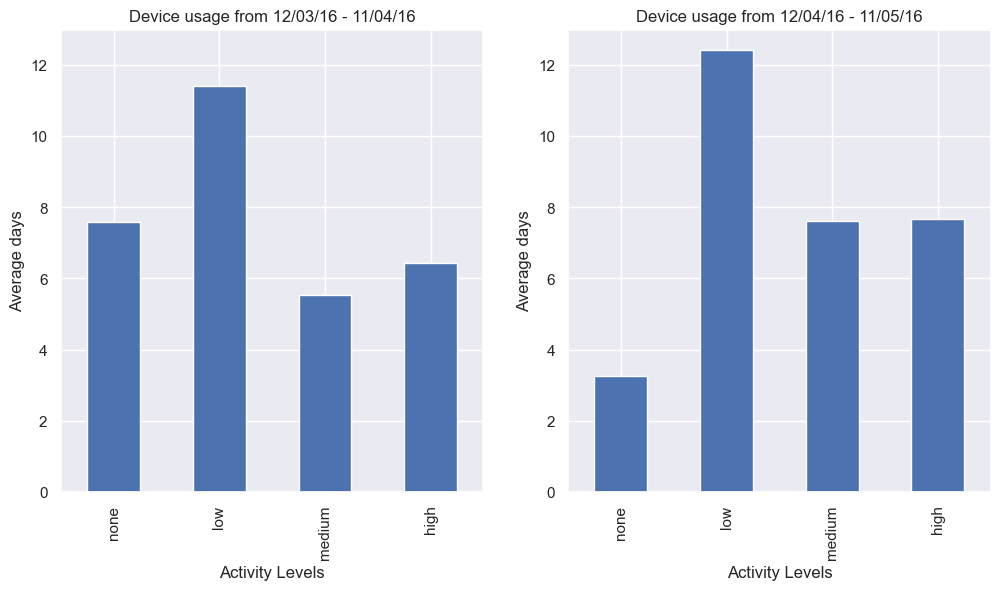

In [54]:
# Plotting device usage
activity_grp1 = daily_act_sleep_period1_df.groupby(['ActivityLevels'], observed=True)
activity1 = (activity_grp1['ActivityLevels'].count()/len(daily_act_sleep_period1_df)) * len(period1)

activity_grp2 = daily_act_sleep_period2_df.groupby(['ActivityLevels'], observed=True)
activity2 = (activity_grp2['ActivityLevels'].count()/len(daily_act_sleep_period2_df)) * len(period1)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
activity1.plot(kind='bar', title='Device usage from 12/03/16 - 11/04/16', 
                xlabel='Activity Levels', ylabel='Average days')
plt.ylim([0,13])

plt.subplot(1,2,2)
activity2.plot(kind='bar', title='Device usage from 12/04/16 - 11/05/16', 
                xlabel='Activity Levels', ylabel='Average days')
plt.ylim([0,13])

#### - Discussion of Results
In the first period, the average number of days the user was not wearing the device was ~ 7 days. This drop to ~ 3 days in the second period. Also, the users in the second period showed more average days of activity (low, medium and high) compared to period 1. This is a good thing cause maybe the users are getting more familiar with the device and are using it more often overtime.  

## 6.2  Analyzing Data to Find Any Correlation Between Overall Activity Minutes and Calories Burnt

We have used the overall active minutes instead of steps for our analysis as activity minutes are a better indicator of daily activity than steps. [[1]](https://onlinelibrary.wiley.com/doi/10.1080/17461391.2016.1255261) 

In [55]:
daily_act_sleep_period1_df['OverallActiveMinutes'] = (daily_act_sleep_period1_df['LightlyActiveMinutes'] + 
                                                      daily_act_sleep_period1_df['FairlyActiveMinutes'] + 
                                                      daily_act_sleep_period1_df['VeryActiveMinutes'])

daily_act_sleep_period2_df['OverallActiveMinutes'] = (daily_act_sleep_period2_df['LightlyActiveMinutes'] + 
                                                      daily_act_sleep_period2_df['FairlyActiveMinutes'] + 
                                                      daily_act_sleep_period2_df['VeryActiveMinutes'])


If overall active minutes is zero, means the user is not wearing the device so we don't include it in our analysis. 

In [56]:
daily_act_sleep_period1_df = daily_act_sleep_period1_df[daily_act_sleep_period1_df['OverallActiveMinutes'] != 0]
daily_act_sleep_period2_df = daily_act_sleep_period2_df[daily_act_sleep_period2_df['OverallActiveMinutes'] != 0]

Let's plot a scatter plot to observe is there is any correlation between overall activity minutes and calories burnt. 

<Axes: title={'center': 'Period2 - 12/04/16 - 11/05/16'}, xlabel='OverallActiveMinutes', ylabel='Calories'>

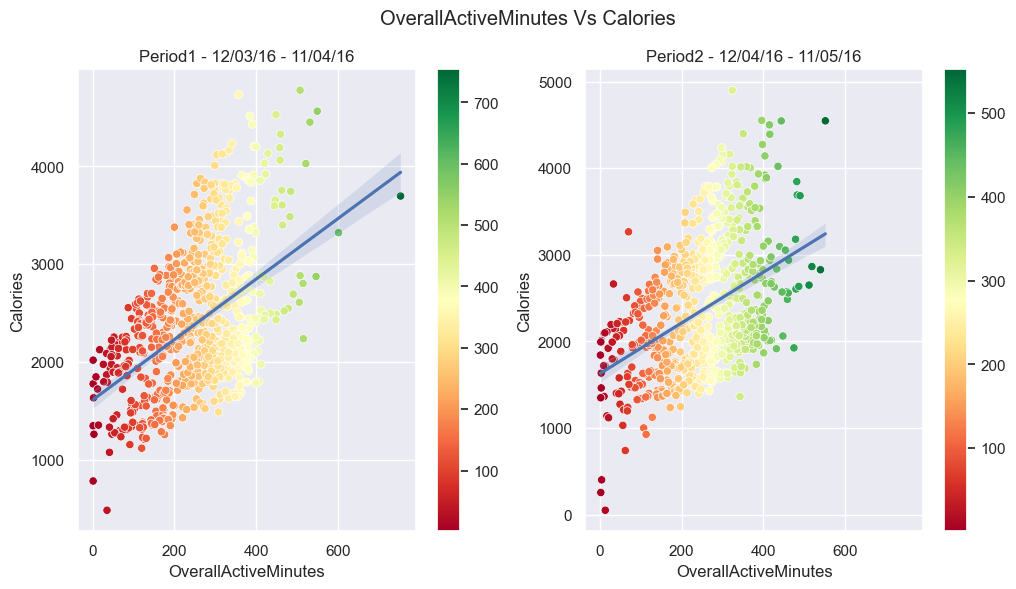

In [57]:
# Plotting OverallActiveMinutes Vs Calories 
sns.set()
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12,6))
figure.suptitle('OverallActiveMinutes Vs Calories')
axes[0].set_title('Period1 - 12/03/16 - 11/04/16')
axes[1].set_title('Period2 - 12/04/16 - 11/05/16')

# For period 1
ax0 = sns.scatterplot(ax=axes[0], x='OverallActiveMinutes', y='Calories', hue='OverallActiveMinutes', 
                      palette='RdYlGn', data=daily_act_sleep_period1_df)

norm0 = plt.Normalize(daily_act_sleep_period1_df['OverallActiveMinutes'].min(), 
                      daily_act_sleep_period1_df['OverallActiveMinutes'].max())

sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm0)
ax0.get_legend().remove()
ax0.figure.colorbar(sm, ax=ax0)

sns.regplot(data=daily_act_sleep_period1_df, x='OverallActiveMinutes', y='Calories', scatter=False, ax=ax0)

# For period 2
ax1 = sns.scatterplot(ax=axes[1], x='OverallActiveMinutes', y='Calories', hue='OverallActiveMinutes', 
                     palette='RdYlGn', data=daily_act_sleep_period2_df)

norm1 = plt.Normalize(daily_act_sleep_period2_df['OverallActiveMinutes'].min(), 
                      daily_act_sleep_period2_df['OverallActiveMinutes'].max())

sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm, ax=ax1)

sns.regplot(data=daily_act_sleep_period2_df, x='OverallActiveMinutes', y='Calories', scatter=False, ax=ax1)

#### - Discussion of Results
It is obvious from the scatter plots from both the periods that there is positive correlation between overall active minutes and calories burnt.

## 6.3  Analyzing Data to Find Any Correlation Between Overall Activity Minutes and Sleep

Lets only include user data if there is sleep data for that day.

In [58]:
daily_act_sleep_period1_df = daily_act_sleep_period1_df[daily_act_sleep_period1_df['TotalTimeInBed'] != 0]
daily_act_sleep_period2_df = daily_act_sleep_period2_df[daily_act_sleep_period2_df['TotalTimeInBed'] != 0]

Like from the previous analysis, let's do a scatter plot to observe is there is any correlation between overall activity minutes and minutes asleep. 

<Axes: title={'center': 'Period2 - 12/04/16 - 11/05/16'}, xlabel='OverallActiveMinutes', ylabel='TotalMinutesAsleep'>

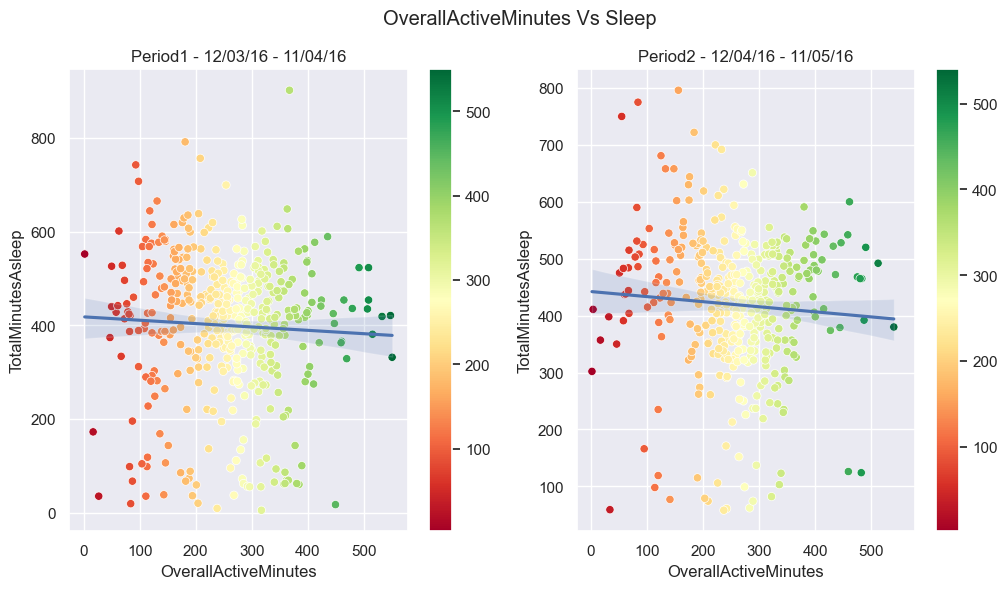

In [59]:
sns.set()
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(12,6))
figure.suptitle('OverallActiveMinutes Vs Sleep')
axes[0].set_title('Period1 - 12/03/16 - 11/04/16')
axes[1].set_title('Period2 - 12/04/16 - 11/05/16')

# For period 1
ax0 = sns.scatterplot(ax=axes[0], x='OverallActiveMinutes', y='TotalMinutesAsleep', hue='OverallActiveMinutes', 
                      palette='RdYlGn', data=daily_act_sleep_period1_df)

norm0 = plt.Normalize(daily_act_sleep_period1_df['OverallActiveMinutes'].min(), 
                      daily_act_sleep_period1_df['OverallActiveMinutes'].max())

sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm0)
ax0.get_legend().remove()
ax0.figure.colorbar(sm, ax=ax0)

sns.regplot(data=daily_act_sleep_period1_df, x='OverallActiveMinutes', y='TotalMinutesAsleep', scatter=False, ax=ax0)

# For period 2
ax1 = sns.scatterplot(ax=axes[1], x='OverallActiveMinutes', y='TotalMinutesAsleep', hue='OverallActiveMinutes', 
                     palette='RdYlGn', data=daily_act_sleep_period2_df)

norm1 = plt.Normalize(daily_act_sleep_period2_df['OverallActiveMinutes'].min(), 
                      daily_act_sleep_period2_df['OverallActiveMinutes'].max())

sm = plt.cm.ScalarMappable(cmap='RdYlGn', norm=norm1)
ax1.get_legend().remove()
ax1.figure.colorbar(sm, ax=ax1)

sns.regplot(data=daily_act_sleep_period2_df, x='OverallActiveMinutes', y='TotalMinutesAsleep', scatter=False, ax=ax1)


#### - Discussion of Results
There is no correlation between overall active minutes and sleep in both periods.

## 6.4 Analyzing Data to Find What Hour of the Day are Users Most Active

Finding the average intensity of the users throughout the data.
We are going to take the hour-by-hour intensities for both periods and combined them in our analysis.

In [63]:
# Load intensities hourly data 
intensities_hr_period1_df = pd.read_csv(cwd + "/datasource/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv")
intensities_hr_period2_df = pd.read_csv(cwd + "/datasource/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
intensities_hr_combined_df = pd.concat([intensities_hr_period1_df, intensities_hr_period2_df], ignore_index=True)

Calculating and plotting the average intensities of the users 

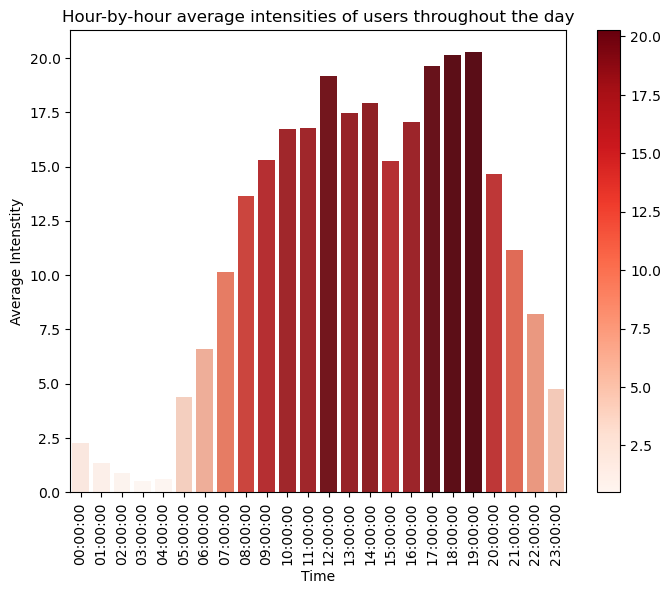

In [64]:
intensities_hr_combined_df['ActivityHour'] = pd.to_datetime(intensities_hr_combined_df['ActivityHour'], format='%m/%d/%Y %I:%M:%S %p') 
intensities_hr_combined_df['time'] = intensities_hr_combined_df['ActivityHour'].dt.strftime('%H:%M:%S')
intensities_hr_grp = intensities_hr_combined_df.groupby(['time'])
average_intensity_hr = intensities_hr_grp['TotalIntensity'].mean()
average_intensity_hr = average_intensity_hr.reset_index()

plt.style.use('default')
plt.figure(figsize=(8,6))
plt.xticks(rotation = 90)

norm = plt.Normalize(average_intensity_hr['TotalIntensity'].min(), average_intensity_hr['TotalIntensity'].max())
sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
ax = sns.barplot(x=average_intensity_hr.time, y=average_intensity_hr.TotalIntensity, 
                 hue=average_intensity_hr.TotalIntensity, palette='Reds', dodge=False)

ax.set_ylabel('Average Intenstity')
ax.set_xlabel('Time')
ax.set_title('Hour-by-hour average intensities of users throughout the day')
ax.get_legend().remove()
ax.figure.colorbar(sm, ax=ax)

#### - Discussion of Results
Based on the average hour-by-hour intensity throughout the day, the users are more active at lunch time between 12 pm to 2pm. They are most active in the evening between 5pm to 7pm. It also looks like these batch of users are not active in the mornings.

## 7. Summary and Conclusion

Health and fitness wearables are extremely useful in our daily lives as they provide a convenient way to monitor and improve health and wellness. 
In this study, we analyzed the data from the Bellabeat fitness tracker devices over a 2-month period to gain insights into how the consumers used their smart devices. These were our key findings:

* For period 1 between 12 March 2016 to 11 April 2016, there was one user that did not wear the device throughout the whole period. Since the users consented to this study, a follow up with the user could be done to ensure that they were wearing their device properly.

* The average number of days that the users were not wearing the device was 5 days between the two periods. We could send a reminder in the app to notify the users that they have not been recently wearing their smart devices. 

* The users in the second period showed more average days of activity compared to period 1. Therefore, we need to acclimatize the user to wear the device more consistently with things like reminders and notifications from the app.

* There was a positive correlation between overall active minutes and the number of calories burnt. Therefore, we could motivate the user by helping them visualize their progress in the app and giving them rewards and encouragement so that they stay active and healthy.

* There was no correlation between overall active minutes and sleep in both periods.

* The users were most active during lunch time and evening time. We should try and encourage users to be also active in the morning time.

* There is not enough heart rate and weight log data to conduct an analysis. This could be because some of the product models in 2016 did not have any heart rate monitors. To get users to enter the weight log data, there could be an option to prompt the user to enter their weight details when signing up with the app.

* Since the data gathered is from 2016, it may be outdated as fitness trackers have matured since 2016. Therefore, it would be better to do another round of study with more up-to-date data to get more accurate insights from today's users.